In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import re

In [4]:
data = pd.read_csv("../Data/properatti.csv", sep = ",")

In [5]:
data_1=data.drop(columns=['image_thumbnail','properati_url','lat-lon'])

In [6]:
data_1.columns.isnull().sum()

0

In [7]:
data_1.isnull().sum()/data_1.shape[0]

Unnamed: 0                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.154405
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
description                   0.000016
title                         0.000000
dtype: float64

In [8]:
data_1.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,...,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,...,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,...,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO


<AxesSubplot:>

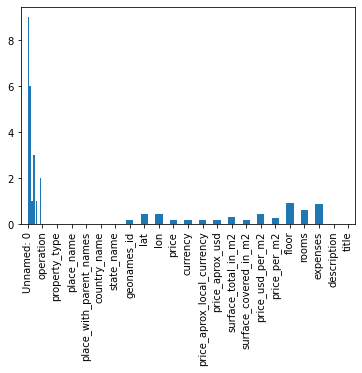

In [9]:
(data_1.isnull().sum()/data_1.shape[0]).hist()
(data_1.isnull().sum()/data_1.shape[0]).plot(kind = 'bar')

In [10]:
data_1.shape[0]

121220

In [11]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

<AxesSubplot:>

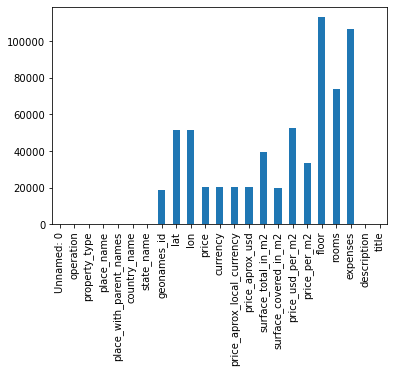

In [12]:
# number of nulls for each column
vc_nulls = data_1.apply(lambda x: x.isnull().value_counts()).T[True]
vc_nulls.hist() # if you want a histogram of these counts
# or if you wanted to plot the null count of each column as a bar
vc_nulls.plot(kind = 'bar')

In [13]:
monedas=data_1['currency'].unique()
monedas

array(['USD', nan, 'ARS', 'PEN', 'UYU'], dtype=object)

In [14]:
data_1['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [15]:
#mask1=(data_1['currency']=='PEN')or(data_1['currency']=='UYU')
mask1=data['currency']=='UYU'
data_1[mask1]


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
107390,107390,sell,house,San Roque,|Argentina|Mendoza|San Roque|,Argentina,Mendoza,3836586.0,NaN,NaN,...,22980378.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Casa con Calefacción central, Mendoza, San Roq...",Casa - San Vicente


In [16]:
mask2=data['currency']=='PEN'
data_1[mask2]


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
50387,50387,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,117139.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...,DUPLEX A LA VENTA | Liniers 1200 | Tandil
50388,50388,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,292848.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 56Duplex en venta de 1 dormitorio con ap...,DUPLEX A LA VENTA | Liniers 1200 | Tandil


In [17]:
data_2=data_1.drop(index=[107390,50387,50388])

data_2['currency'].unique()

array(['USD', nan, 'ARS'], dtype=object)

In [51]:
data_2.isnull().sum()/data_2.shape[0]*100

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440904
lat                           42.524563
lon                           42.524563
price                         16.837572
currency                      16.838397
price_aprox_local_currency    16.837572
price_aprox_usd               16.837572
surface_total_in_m2           32.441819
surface_covered_in_m2         16.420139
price_usd_per_m2              43.393253
price_per_m2                  27.685061
floor                         93.483587
rooms                         60.904824
expenses                      88.234324
description                    0.001650
title                          0.000000
pileta                         0.000000
cochera                        0.000000


In [19]:
data_2.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,...,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,...,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,...,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,-34.647797,-58.516424,...,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,-38.002626,-57.549447,...,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


### Borremos los datos duplicados para eso saquemos los que tengan igual lon, lat y descripción.

In [20]:
data_2_nodup = data_2.drop_duplicates(subset = ['description',"lat", "lon"], keep = "first")

In [21]:
data_2_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106385 entries, 0 to 121219
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  106385 non-null  int64  
 1   operation                   106385 non-null  object 
 2   property_type               106385 non-null  object 
 3   place_name                  106362 non-null  object 
 4   place_with_parent_names     106385 non-null  object 
 5   country_name                106385 non-null  object 
 6   state_name                  106385 non-null  object 
 7   geonames_id                 89413 non-null   float64
 8   lat                         64074 non-null   float64
 9   lon                         64074 non-null   float64
 10  price                       90165 non-null   float64
 11  currency                    90164 non-null   object 
 12  price_aprox_local_currency  90165 non-null   float64
 13  price_aprox_us

In [22]:
data_2_nodup.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,...,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,...,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,...,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,-34.647797,-58.516424,...,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,-38.002626,-57.549447,...,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


### Analicemos outliers de la columna 'price_aprox_usd'

In [23]:
describe_price_aprox_usd = data_2_nodup["price_aprox_usd"].describe()
describe_price_aprox_usd

count    9.016500e+04
mean     2.453305e+05
std      3.946432e+05
min      0.000000e+00
25%      9.000000e+04
50%      1.500000e+05
75%      2.750000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [24]:
q1 = describe_price_aprox_usd.quantile(0.25)
print(q1)
q2 = describe_price_aprox_usd.quantile(0.5)
print(q2)
q3 = describe_price_aprox_usd.quantile(0.75)
print(q3)


iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)

outlier_mask_up = describe_price_aprox_usd > up_threshold
outlier_mask_down = describe_price_aprox_usd < low_threshold
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
not_outliers = np.logical_not(outlier_mask)

outliers = describe_price_aprox_usd[outlier_mask]

90123.75
197665.27362274716
304910.7888335794
627091.3470839486
-232056.8082503691


In [25]:
describe_price_aprox_usd_filtered = describe_price_aprox_usd[not_outliers]
describe_price_aprox_usd_filtered.describe()

count         7.000000
mean     177876.957511
std      134662.256896
min           0.000000
25%       90082.500000
50%      150000.000000
75%      260165.273623
max      394643.155334
Name: price_aprox_usd, dtype: float64

In [26]:
describe_price_aprox_usd.describe()

count    8.000000e+00
mean     5.973823e+06
std      1.639388e+07
min      0.000000e+00
25%      9.012375e+04
50%      1.976653e+05
75%      3.049108e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

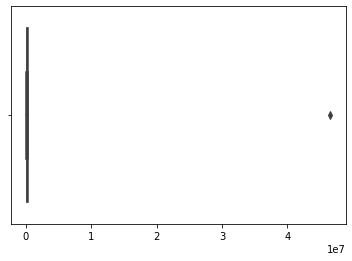

In [27]:
sns.boxplot(x=describe_price_aprox_usd.values);

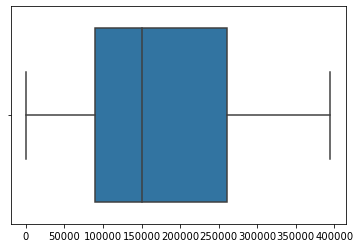

In [28]:
sns.boxplot(x=describe_price_aprox_usd_filtered.values);

### Analicemos outliers de la columna 'price_usd_per_m2'

In [29]:
describe_price_usd_per_m2 = data_2_nodup["price_usd_per_m2"].describe()
describe_price_usd_per_m2

count     59963.000000
mean       2111.413567
std        2723.313845
min           0.600000
25%        1142.445185
50%        1747.572816
75%        2422.588360
max      173826.066667
Name: price_usd_per_m2, dtype: float64

In [30]:
q1 = describe_price_usd_per_m2.quantile(0.25)
print(q1)
q2 = describe_price_usd_per_m2.quantile(0.5)
print(q2)
q3 = describe_price_usd_per_m2.quantile(0.75)
print(q3)


iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)

#6.d
outlier_mask_up = describe_price_usd_per_m2 > up_threshold
outlier_mask_down = describe_price_usd_per_m2 < low_threshold
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
not_outliers = np.logical_not(outlier_mask)

outliers = describe_price_usd_per_m2[outlier_mask]

1596.2909079467818
2267.0009634694443
17033.235383384126
40188.65209654014
-21559.125805209234


In [31]:
describe_price_usd_per_m2_filtered = describe_price_usd_per_m2[not_outliers]
describe_price_usd_per_m2_filtered.describe()

count       6.000000
mean     1691.322295
std       993.901944
min         0.600000
25%      1293.727093
50%      1929.493191
75%      2344.794662
max      2723.313845
Name: price_usd_per_m2, dtype: float64

In [32]:
describe_price_usd_per_m2.describe()

count         8.000000
mean      30492.125055
std       61406.151310
min           0.600000
25%        1596.290908
50%        2267.000963
75%       17033.235383
max      173826.066667
Name: price_usd_per_m2, dtype: float64

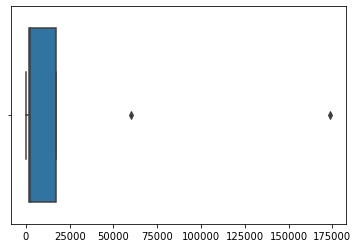

In [33]:
sns.boxplot(x=describe_price_usd_per_m2.values);

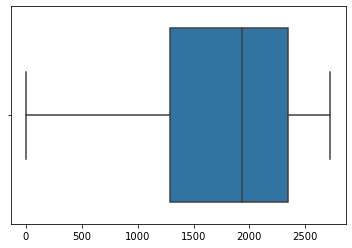

In [34]:
sns.boxplot(x=describe_price_usd_per_m2_filtered.values);

### Observando un poco la columna description

In [35]:
data_2['description'][1]

'Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

In [36]:
pileta_pattern = "pileta"
pileta_regex = re.compile(pileta_pattern, re.I)
pileta_matches = data_2['description'].apply(lambda x: x if x is np.NaN else pileta_regex.search(x))
pileta_mask = pileta_matches.notnull()
pileta_description = pileta_matches.loc[pileta_mask]

In [37]:
pileta_description

7         <re.Match object; span=(101, 107), match='PILE...
8         <re.Match object; span=(101, 107), match='PILE...
23        <re.Match object; span=(388, 394), match='pile...
30        <re.Match object; span=(357, 363), match='pile...
36        <re.Match object; span=(311, 317), match='pile...
                                ...                        
121211    <re.Match object; span=(451, 457), match='pile...
121212    <re.Match object; span=(594, 600), match='pile...
121213    <re.Match object; span=(264, 270), match='pile...
121215    <re.Match object; span=(287, 293), match='pile...
121216    <re.Match object; span=(883, 889), match='pile...
Name: description, Length: 19042, dtype: object

In [38]:
pileta_description.iloc[0].string

'EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR  MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

In [39]:
pileta_mask

0         False
1         False
2         False
3         False
4         False
          ...  
121215     True
121216     True
121217    False
121218    False
121219    False
Name: description, Length: 121217, dtype: bool

In [40]:
description_to_replace = [x.string for x in pileta_description]
print(len(description_to_replace))
description_to_replace_unique = list(set(description_to_replace))
print(len(description_to_replace_unique))

19042
17116


In [41]:
data_2['pileta']=''

In [42]:
data_2['cochera']=''

In [43]:
data_2.loc[pileta_mask, 'pileta'] =1


In [44]:
data_2.head(4)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,pileta,cochera
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,,
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,,
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,,
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,,


In [45]:
cochera_pattern = "cochera"
cochera_regex = re.compile(cochera_pattern, re.I)
cochera_matches = data_2['description'].apply(lambda x: x if x is np.NaN else cochera_regex.search(x))
cochera_mask = cochera_matches.notnull()
cochera_description = cochera_matches.loc[cochera_mask]

In [46]:
cochera_description.iloc[0].string

'Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

In [47]:
description_to_replace_cochera= [x.string for x in cochera_description]
print(len(description_to_replace_cochera))
description_to_replace_unique_cochera = list(set(description_to_replace_cochera))
print(len(description_to_replace_unique_cochera))

42440
35379


In [48]:
data_2.loc[cochera_mask, 'cochera'] = 1

In [49]:
data_2.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,pileta,cochera
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,,
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,,1
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,,


In [50]:
data_2["price_usd_per_m2"].describe()

count     68617.000000
mean       2160.086916
std        2759.288621
min           0.600000
25%        1218.181818
50%        1800.000000
75%        2486.411765
max      206333.333333
Name: price_usd_per_m2, dtype: float64